<a href="https://colab.research.google.com/github/shcho11/00.ML_Practices_2022_KB/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [71]:
iris = load_iris()
x = iris.data
y = iris.target
col_nm = iris.feature_names

In [72]:
col_nm

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [73]:
from sklearn.cluster import KMeans

In [84]:
# 최적의 클러스터 수 찾기
wcss = []
# WCSS : sum of squared distance between each point and the centroid in a cluster

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = None)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

    # init =‘k-means++’(default:‘k-means++’) : Method for initialization .(‘k-means++’: selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.)
    # 'max_iter' = 300 (default:300) : Maximum number of iterations of the k-means algorithm for a single run.
    # random_state = 0 (default:None): Determines random number generation for centroid initialization. Use an int to make the randomness deterministic.
    # n_initint (default=10) : Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.


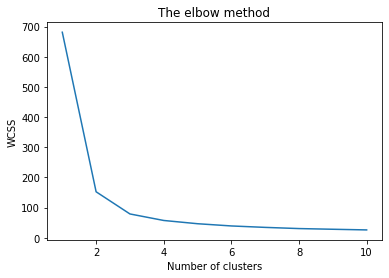

In [85]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [93]:
k = 3 

km = KMeans(n_clusters=k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = None)
y_km = kmeans.fit_predict(x)
'''
n_clusters=10 : 몇개의 클러스터로 구분 할 것인지
max_iter=300 : centroid 업데이트 횟수. 데이터가 크면 클 수록 늘어나야 함.
파라메터와 별개로 중심점과 샘플간의 거리 척도는 유클리디언 거리를 사용하며 거리척도는 변경 불가능하다.
'''

'\nn_clusters=10 : 몇개의 클러스터로 구분 할 것인지\nmax_iter=300 : centroid 업데이트 횟수. 데이터가 크면 클 수록 늘어나야 함.\n파라메터와 별개로 중심점과 샘플간의 거리 척도는 유클리디언 거리를 사용하며 거리척도는 변경 불가능하다.\n'

In [94]:
km.fit(x)

KMeans(n_clusters=3)

In [95]:
# 모델이 임의로 부여한 클래스에 어떠한 의미도 없으며 순서가 무작위
# 이런 이유로 임의평가가 조금 복잡한 과정을 지님.
# 학습 결과 확인
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [89]:
print("0 Cluster ; ", y[km.labels_ == 0])
print("1 Cluster ; ", y[km.labels_ == 1])
print("2 Cluster ; ", y[km.labels_ == 2])

0 Cluster ;  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
1 Cluster ;  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
2 Cluster ;  [1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


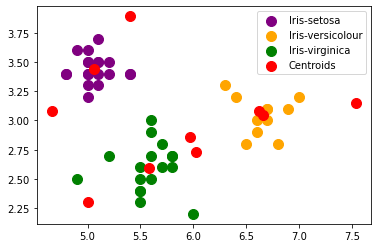

In [96]:
#Visualising the clusters
plt.scatter(x[y_km == 0, 0], x[y_km == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_km == 1, 0], x[y_km == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_km == 2, 0], x[y_km == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()